# BÀI 1

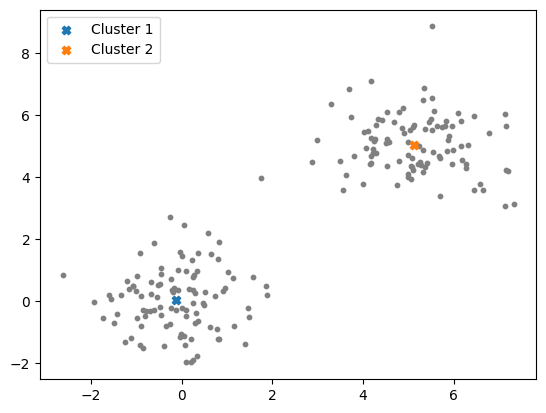

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Tạo dữ liệu giả lập với 2 Gaussian
np.random.seed(42)
data1 = np.random.normal(loc=0, scale=1, size=(100, 2))
data2 = np.random.normal(loc=5, scale=1, size=(100, 2))
data = np.vstack([data1, data2])

# Hàm Gaussian PDF
def gaussian_pdf(x, mean, cov):
    d = len(mean)
    return (1/np.sqrt((2*np.pi)**d * np.linalg.det(cov))) * \
           np.exp(-0.5 * np.dot(np.dot((x - mean), np.linalg.inv(cov)), (x - mean).T))

# Hàm EM cho GMM
def fit_gmm(data, k=2, max_iter=100):
    n, d = data.shape
    weights = np.ones(k) / k
    means = np.random.randn(k, d)
    covariances = np.array([np.eye(d) for _ in range(k)])
    
    for _ in range(max_iter):
        # E-step: Tính xác suất posterior (responsibility)
        responsibilities = np.zeros((n, k))
        for i in range(k):
            for j in range(n):
                responsibilities[j, i] = weights[i] * gaussian_pdf(data[j], means[i], covariances[i])
        responsibilities /= responsibilities.sum(axis=1)[:, np.newaxis]
        
        # M-step: Cập nhật các tham số
        weights = responsibilities.mean(axis=0)
        means = np.dot(responsibilities.T, data) / responsibilities.sum(axis=0)[:, np.newaxis]
        for i in range(k):
            diff = data - means[i]
            covariances[i] = np.dot(responsibilities[:, i] * diff.T, diff) / responsibilities[:, i].sum()
    
    return means, covariances, weights

# Huấn luyện GMM
means, covariances, weights = fit_gmm(data)

# Hiển thị kết quả
plt.scatter(data[:, 0], data[:, 1], c='gray', s=10)
for i in range(len(means)):
    plt.scatter(means[i][0], means[i][1], marker='X', label=f'Cluster {i+1}')
plt.legend()
plt.show()


# Bài 2

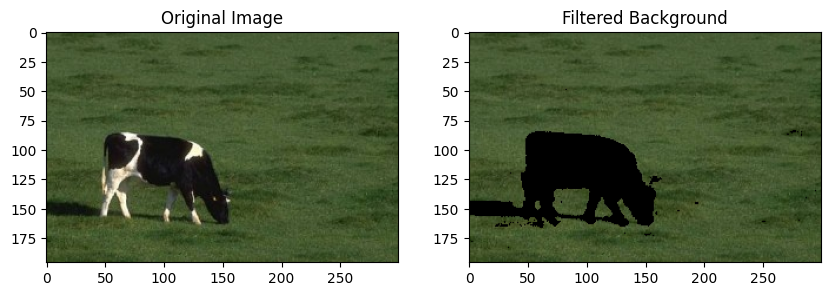

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh
img = cv2.imread('cow.jpg')

# Chuyển ảnh sang không gian màu RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Reshape ảnh thành một mảng 2D, mỗi điểm ảnh là một dòng
pixels = img_rgb.reshape(-1, 3)

# Tạo và huấn luyện mô hình GMM
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2)  # Chia thành 2 cụm (nền và đối tượng)
gmm.fit(pixels)

# Dự đoán nhãn cho các điểm ảnh
labels = gmm.predict(pixels)

# Chia ảnh thành nền và đối tượng
foreground = labels.reshape(img_rgb.shape[:2])  # Reshape lại thành dạng ảnh 2D
background = np.zeros_like(img_rgb)

# Gán màu nền cho các điểm ảnh không phải đối tượng
background[foreground == 0] = img_rgb[foreground == 0]

# Hiển thị ảnh gốc và ảnh nền đã lọc
plt.figure(figsize=(10, 5))

# Hiển thị ảnh gốc
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')

# Hiển thị ảnh nền đã lọc
plt.subplot(1, 2, 2)
plt.imshow(background)
plt.title('Filtered Background')

plt.show()
